# Antonio Esteves

* Realize uma análise exploratória nos dados, identificando e explorando (10 pts.): 
  * **(i)** correlações entre as variáveis - **DONE** 
  * **(ii)** distribuição das variáveis - **DONE** 
  * **(iii)** valores ausentes - **DONE** 
* Usando todas as variáveis disponíveis, tune (usando validação cruzada): 
  * **(i)** um modelo de regressão Ridge - **DONE** 
  * **(ii)** um modelo de regressão Lasso - **DONE** 
  * **(iii)** um modelo KNN - **DONE** 
  
  Para os modelos de regressão linear, o parâmetro a ser tunado é o lambda (penalização dos coeficientes) e no KNN o número (K) de vizinhos. Compare os três modelos em termos do erro RMSE de validação cruzada. (30 pts.)  - **DONE** 

* Quais as variáveis mais importantes segundo o modelo de regressão Ridge e Lasso?  Variáveis foram descartadas pelo Lasso? Quais? (10 pts.)

* Re-treine o melhor modelo (usando os melhores valores de parâmetros encontrados em todos os dados, sem usar validação cruzada). Use esse último modelo treinado para prever os dados de teste disponíveis no challenge que criamos na plataforma Kaggle (30 pts.)

### Ideias para melhorar os resultados:

* Tente criar novas variáveis a partir das variáveis existentes. 
* Tente usar transformações (e.g. log) nas variáveis que apresentarem viés.
* Tente normalizar as variáveis.
* Experimente estratégias diferentes para lidar com dados ausentes (NAs).
* Use outros métodos de regressão. Por exemplo, SVR, Árvores de Regressão e Florestas Aleatórias.

# Dependências

In [480]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Declarando Funções

In [481]:
def get_result(train_rmse, test_rmse):
    df = pd.DataFrame(columns=['RMSE Treino', 'RMSE Teste'], index = ['Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Random Forest'])
    df['RMSE Treino'] = np.array(train_rmse)
    df['RMSE Teste'] = np.array(test_rmse)
    df = df.T
    
    return df

In [482]:
def predict_plot(y, y_pred, label_set, label_var, color):
    plt.figure(figsize=(15, 10))
    plt.title('Estimativa de predição sob os dados de ' + label_set + ' - '+ label_var, fontsize=20)
    plt.plot(y, label='Actual', color=color[0])
    plt.plot(y_pred, label='Predicted', color=color[1])
    plt.xlabel('n-ésima amostra')
    plt.ylabel('CRA')
    plt.grid()
    plt.legend()

In [483]:
def scores_plot(df):
    df = df.T.head(25)
    df.plot(kind='bar',figsize=(15,10), color=['#669ACC', 'yellowgreen'])
    plt.title('Comparativo RMSE Treino vs Teste', fontsize=20)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='#D3D3D3')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.xticks(rotation='horizontal')
    plt.show()

In [484]:
def get_results(pipeline, parameters, X_train, y_train, X, y):

    grid_obj = GridSearchCV(estimator=pipeline,
                            param_grid=parameters,
                            cv=3,
                            scoring='r2',
                            verbose=2,
                            n_jobs=1,
                            refit=True)
    grid_obj.fit(X_train, y_train)

    '''Results'''

    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)

    return results_sorted, grid_obj

In [485]:
def model(pipeline, parameters, X_train, y_train, X, y):

    grid_obj = GridSearchCV(estimator=pipeline,
                            param_grid=parameters,
                            cv=3,
                            scoring='r2',
                            verbose=2,
                            n_jobs=1,
                            refit=True)
    grid_obj.fit(X_train, y_train)

    '''Results'''

    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)
    
    print()
    print("##### Results #####")
    print(results_sorted)
    
    print()
    print("best_index", grid_obj.best_index_)
    print("best_score", grid_obj.best_score_)
    print("best_params", grid_obj.best_params_)

    '''Cross Validation'''

    estimator = grid_obj.best_estimator_
    '''
    if estimator.named_steps['scl'] == True:
        X = (X - X.mean()) / (X.std())
        y = (y - y.mean()) / (y.std())
    '''
    shuffle = KFold(n_splits=5,
                    shuffle=True,
                    random_state=0)
    cv_scores = cross_val_score(estimator,
                                X,
                                y.values.ravel(),
                                cv=shuffle,
                                scoring='r2')
    
    print()
    print("##### CV Results #####")
    print("mean_score", cv_scores.mean())
    
    '''Show model coefficients or feature importances'''

    try:
        # print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
        print()
        print("##### Model coefficients: #####")

        names = X.columns
        for c, att in zip(estimator.named_steps['clf'].coef_, names):
            print(type(c))
            print('{}: {}'.format(att, round(c, 3)))
    except:
        print()
        print("Model does not support model coefficients")

    try:
        print()
        print("##### Feature importances: #####")
        print(list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
    except:
        print()
        print("Model does not support feature importances")
        
    '''Predict along CV and plot y vs. y_predicted in scatter'''

In [486]:
def features_coefficients(estimator):
    try:
    # print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
        print()
        print("##### Model coefficients: #####")

        names = X.columns
        for c, att in zip(estimator.named_steps['clf'].coef_, names):
            print('{}: {}'.format(att, round(c, 3)))
    except:
        print()
        print("Model does not support model coefficients")

    try:
        print()
        print("##### Feature importances: #####")
#         print(list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
        names = X.columns
        for c, att in zip(estimator.named_steps['clf'].feature_importances_, names):
            print('{}: {}'.format(att, round(c, 3)))
    except:
        print()
        print("Model does not support feature importances")

# Carregando Dados

In [626]:
train_rmse = []
test_rmse = []
cartola = pd.read_csv('../data/cartola_2014/cartola_2014_train.csv')
df = pd.DataFrame(cartola)

In [488]:
cartola.head()

,atleta_id,rodada,clube_id,participou,posicao_id,jogos_num,pontos_num,media_num,preco_num,variacao_num,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
0,37958,1,262.0,1,1.0,1,8.0,8.0,19.69,1.69,...,0,0,0,0,0,0,1,1,0,0
1,68873,1,262.0,0,1.0,0,0.0,0.0,4.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,37701,1,262.0,1,2.0,1,0.4,0.4,16.97,-5.03,...,0,0,1,0,1,0,1,0,0,0
3,71602,1,262.0,0,2.0,0,0.0,0.0,3.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,37684,1,262.0,1,3.0,1,9.1,9.1,10.68,5.68,...,0,2,1,0,0,0,1,0,0,0


# Sumário dos Dados

Text(0.5, 1.0, 'Distribuição de Notas')

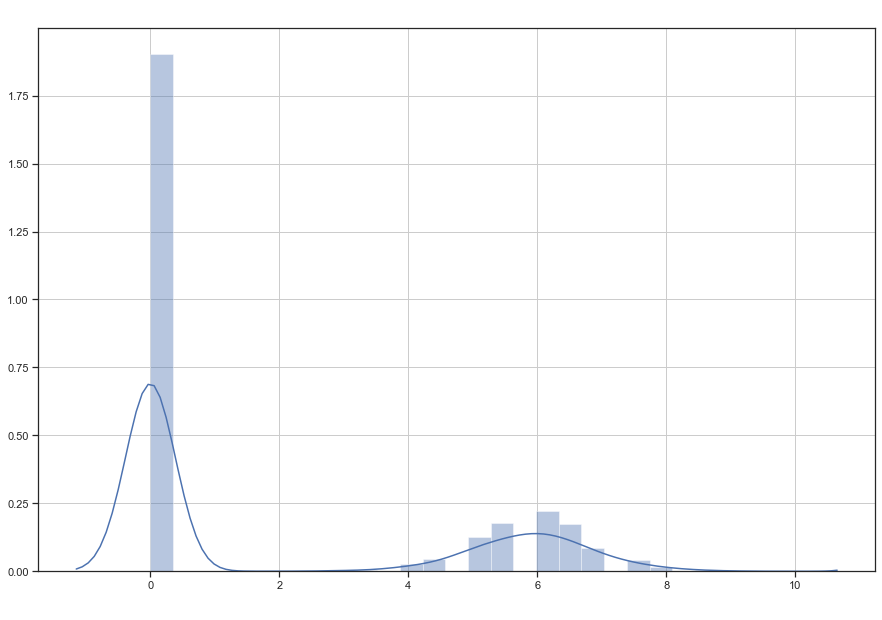

In [489]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.grid()
plt.xlabel('Nota', fontsize=18, color='white')
sns.distplot(cartola['nota'],hist_kws=dict(edgecolor="white")).set_title('Distribuição de Notas', color='white', fontsize=20, fontweight="bold")

In [490]:
cartola.shape

(29184, 34)

In [491]:
cartola.describe()

,atleta_id,rodada,clube_id,participou,posicao_id,jogos_num,pontos_num,media_num,preco_num,variacao_num,...,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS
count,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,...,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000,29184.000000
mean,68725.887061,18.488247,150.176467,0.362390,1.886033,6.363487,0.977100,1.588483,5.599905,-0.000048,...,0.000617,0.310958,0.397272,0.000788,0.053008,0.002193,0.043483,0.034265,0.000411,0.027104
std,16655.955349,10.378876,141.539948,0.480699,2.029297,7.484913,2.768579,2.056103,4.704520,0.736660,...,0.024828,0.832903,0.934368,0.028063,0.224360,0.046779,0.204113,0.291499,0.020274,0.238900
min,36443.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-12.000000,0.760000,-7.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,60784.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72491.000000,18.000000,263.000000,0.000000,1.000000,3.000000,0.000000,0.970000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82463.000000,27.000000,284.000000,1.000000,4.000000,10.000000,0.300000,2.880000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89898.000000,36.000000,316.000000,1.000000,6.000000,36.000000,31.900000,22.100000,29.610000,14.800000,...,1.000000,9.000000,10.000000,1.000000,2.000000,1.000000,1.000000,7.000000,1.000000,6.000000


In [492]:
cartola.isnull().any()

atleta_id       False
rodada          False
clube_id        False
participou      False
posicao_id      False
jogos_num       False
pontos_num      False
media_num       False
preco_num       False
variacao_num    False
partida_id      False
mando           False
titular         False
substituido     False
tempo_jogado    False
nota            False
FS              False
PE              False
A               False
FT              False
FD              False
FF              False
G               False
I               False
PP              False
RB              False
FC              False
GC              False
CA              False
CV              False
SG              False
DD              False
DP              False
GS              False
dtype: bool

# Análise dos Dados

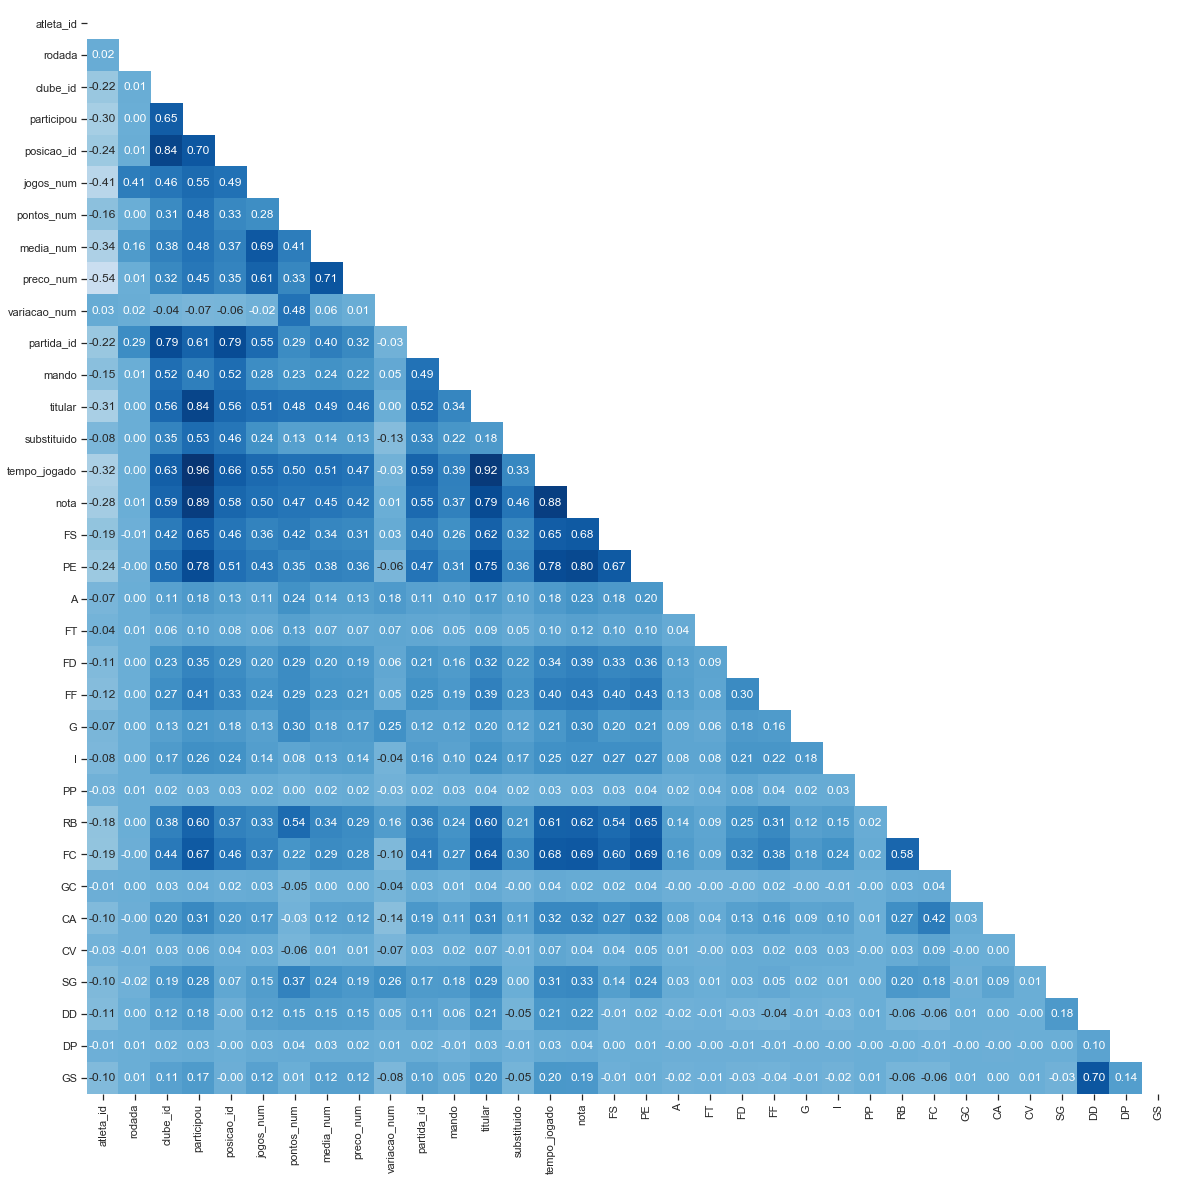

In [493]:
corr = cartola.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)
sns.heatmap(corr, ax=ax, annot=True,  mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

Plotando a matrix de correlação de uma forma mais eficiente podemos avaliar as altas e baixas correlações entre todas as variáveis.

In [494]:
corr.style.background_gradient().set_precision(2).set_properties(**{'font-size': '8pt'})

Se observamos a variável `tempo_jogado` apresenta alta correlação com as variáveis `participou` (0.95) e `titular` (0.92). O mesmo acontece para as variáveis `clube_id` ,`posicao_id` e `partida_id`. Em termos práticos alguns algoritmos lidam melhor quando as variáveis não apresentam alta correlação entre elas. As variáveis citadas anteriormente poderiam então ser excluídas devido a sua alta correlação, tornando o nosso futuro modelo menos instável.

Abaixo podemos ter uma visão das variáveis altamente correlacionadas com a variável `tempo_jogado`.

In [568]:
corr['tempo_jogado'].sort_values(ascending=False)

tempo_jogado    1.000000
participou      0.955614
titular         0.920535
nota            0.884553
PE              0.778819
FC              0.675312
posicao_id      0.658058
FS              0.649539
clube_id        0.634405
RB              0.613007
partida_id      0.590513
jogos_num       0.548449
media_num       0.505286
pontos_num      0.497916
preco_num       0.471632
FF              0.404239
mando           0.385565
FD              0.339901
substituido     0.328232
CA              0.321266
SG              0.306829
I               0.252078
DD              0.209532
G               0.205565
GS              0.199697
A               0.177956
FT              0.098842
CV              0.071428
GC              0.042290
PP              0.032219
DP              0.031671
rodada          0.000361
variacao_num   -0.031340
atleta_id      -0.321096
Name: tempo_jogado, dtype: float64

Abaixo podemos ter uma visão das variáveis melhor correlacionadas com a nossa variável alvo, `nota`.

In [569]:
corr['nota'].sort_values(ascending=False)

nota            1.000000
participou      0.886802
tempo_jogado    0.884553
PE              0.804388
titular         0.794554
FC              0.687256
FS              0.675450
RB              0.624261
clube_id        0.588712
posicao_id      0.577660
partida_id      0.549134
jogos_num       0.499720
pontos_num      0.468712
substituido     0.460132
media_num       0.454526
FF              0.434451
preco_num       0.423061
FD              0.385721
mando           0.373114
SG              0.326806
CA              0.320252
G               0.298257
I               0.270536
A               0.232345
DD              0.221173
GS              0.192247
FT              0.120239
CV              0.043405
DP              0.036911
PP              0.029064
GC              0.023037
variacao_num    0.008120
rodada          0.005669
atleta_id      -0.281441
Name: nota, dtype: float64

Por fim extraimos do conjunto de dados as variáveis que apresentam uma correlação maior ou igula a 0.5 com a variável alvo, são elas: `PE`, `FC`, `FS`, `RB`

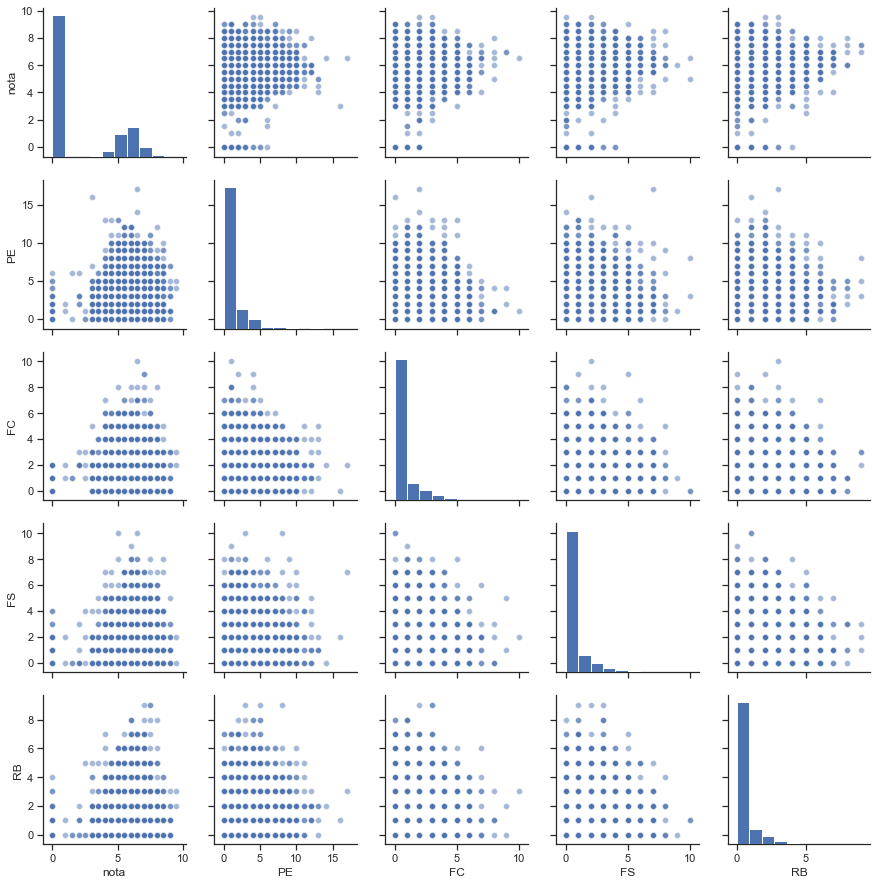

In [571]:
better_corr = cartola[['nota','PE','FC','FS','RB']]
sns.pairplot(better_corr, plot_kws = {'alpha': 0.5})

# Pre-processamento de Dados

## Aplicando a Validação Cruzada

In [495]:
X = cartola.drop(['nota'],axis=1)
y = cartola[['nota']]

kf = KFold(n_splits=10, random_state=42, shuffle=False)
    
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26266, 33) (26266, 1)
(2918, 33) (2918, 1)


## Normalizando os Dados

In [496]:
norm = StandardScaler()
norm = norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [497]:
X_train_norm.shape

(26266, 33)

In [498]:
X_test_norm.shape

(2918, 33)

## Modelo de Regressão Ridge

In [499]:
# def ridge_regression_model(X,Y, l2_penalty):
#     model = Ridge(alpha=l2_penalty)
#     model.fit(X,Y)
#     return model

In [500]:
# from sklearn.model_selection import cross_val_score
# def rmse_cv(model):
#     rmse = np.sqrt(-cross_val_score(model,X_train_norm,y_train,scoring="neg_mean_squared_error",cv=10))
#     return (rmse)

In [501]:
# l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
# cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty)).mean() for l2_penalty in l2_penalties]
# cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
# cv_ridge.head()

In [502]:
# plt.figure(figsize=(15,10))
# cv_ridge.plot(title="Lambda vs Erro de Validação",fontsize=15)
# plt.tight_layout()
# plt.grid()
# plt.xlabel("L2 Penalty")
# plt.ylabel("RMSE")

In [503]:
# best_l2_penalty=cv_ridge.values.argmin()
# best_rmse = cv_ridge.min()

# # melhor valor de (alpha,rmse) encontrado
# print (best_l2_penalty, best_rmse) 

In [504]:
# ridge_model = ridge_regression_model(X_test_norm,y_test,l2_penalty=best_l2_penalty)

# ridge_train_score = ridge_model.score(X_train_norm,y_train)
# ridge_test_score = ridge_model.score(X_test_norm, y_test)

# # print ("Ridge Model Coeficients:", ridge_model.coef_)
# print ("Ridge Regression train score:", ridge_train_score)
# print ("Ridge Regression test score:", ridge_test_score)

In [505]:
# y_pred = ridge_model.predict(X_test_norm)

In [506]:
# df_ridge_results = pd.DataFrame({'Actual': y_test[y_test.columns[0]], 'Predicted': y_pred.flatten()})
# df_ridge_results.head(10)

## Modelo de Regressão Lasso

In [507]:
# def lasso_regression_model(X, Y, l1_penalty):
#     model = Lasso(alpha=l1_penalty, max_iter=10000)
#     model.fit(X,Y)
#     return model

In [508]:
# from sklearn.model_selection import cross_val_score
# def rmse_cv(model):
#     rmse = np.sqrt(-cross_val_score(model,X_train_norm,y_train,scoring="neg_mean_squared_error",cv=10))
#     return (rmse)

In [509]:
# l1_penalties = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10]
# cv_lasso = [rmse_cv(Lasso(alpha=l1_penalty)).mean() for l1_penalty in l1_penalties]
# cv_lasso = pd.Series(cv_lasso,index=l1_penalties)
# cv_lasso.head()

In [510]:
# plt.figure(figsize=(15,10))
# cv_lasso.plot(title="Lambda vs Erro de Validação",fontsize=15)
# plt.tight_layout()
# plt.grid()
# plt.xlabel("L2 Penalty")
# plt.ylabel("RMSE")

In [511]:
# best_l1_penalty=cv_lasso.values.argmin()
# best_rmse = cv_lasso.min()

# # melhor valor de (alpha,rmse) encontrado
# print (best_l1_penalty, best_rmse) 

In [512]:
# lasso_model = lasso_regression_model(X_test_norm,y_test,l1_penalty=best_l1_penalty)

# lasso_train_score = lasso_model.score(X_train_norm,y_train)
# lasso_test_score = lasso_model.score(X_test_norm, y_test)

# print ("Lasso Model Coeficients:", lasso_model.coef_)
# print ("Lasso Regression train score:", ridge_train_score)
# print ("Lasso Regression test score:", ridge_test_score)

In [513]:
# names = X.columns

# for c, att in zip(lasso_model.coef_, names):
#     print('{}: {}'.format(att, round(c, 3)))

# Pipelines

## Pipeline and Parameters - Ridge

A regressão ridge se propõe a evitar o overfitting adicionando um custo ao RSS (dos mínimos quadrados) que depende da norma L2 dos coeficientes  ‖𝑤‖  (ou seja da magnitude dos coeficientes). O resultado é a penalização de ajustes com coeficientes muito grandes. A força dessa penalidade é controlada por um parâmetro lambda (aqui chamado "L2_penalty").



A regressão Ridge é um método de regularização do modelo que tem como principal objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo, também conhecido como multicolinearidade. Com isso com a retirada de determinados atributos do modelo, o mesmo converge para um resultado muito mais estável em que com a redução desses atributos, a redução em termos de acurácia do modelo se mantêm inalterada. O mecanismo algoritmico que faz isso é através de um mecanismo de penalização que coloca um viés e que vai reduzindo os valores os betas até não zero. Com isso os atributos que contribuem menos para o poder preditivo do modelo são levados para a irrelevância usando esse mecanismo de penalização do viés.

In [514]:
pipe_ridge = Pipeline([('scl', StandardScaler()),('clf', Ridge())])

l2_penalty = {'clf__alpha': [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]}

In [515]:
# model(pipe_ridge, l2_penalty, X_train_norm, y_train, X_test_norm, y_test)
ridge_results, ridge_grid_obj = get_results(pipe_ridge, l2_penalty, X_train_norm, y_train, X_test_norm, y_test)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] clf__alpha=0.001 ................................................
[CV] ................................. clf__alpha=0.001, total=   0.1s
[CV] clf__alpha=0.001 ................................................
[CV] ................................. clf__alpha=0.001, total=   0.1s
[CV] clf__alpha=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. clf__alpha=0.001, total=   0.1s
[CV] clf__alpha=0.01 .................................................
[CV] .................................. clf__alpha=0.01, total=   0.1s
[CV] clf__alpha=0.01 .................................................
[CV] .................................. clf__alpha=0.01, total=   0.1s
[CV] clf__alpha=0.01 .................................................
[CV] .................................. clf__alpha=0.01, total=   0.1s
[CV] clf__alpha=0.1 ..................................................
[CV] ................................... clf__alpha=0.1, total=   0.1s
[CV] clf__alpha=0.1 ..................................................
[CV] ................................... clf__alpha=0.1, total=   0.1s
[CV] clf__alpha=0.1 ..................................................
[CV] ................................... clf__alpha=0.1, total=   0.2s
[CV] clf__alpha=0.3 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.2s finished


In [516]:
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077182,0.016518,0.014353,0.005129,0.001,{'clf__alpha': 0.001},0.906497,0.913437,0.912791,0.910908,0.003130,1
1,0.068807,0.008517,0.009755,0.004694,0.01,{'clf__alpha': 0.01},0.906497,0.913437,0.912791,0.910908,0.003131,2
2,0.101756,0.058602,0.010537,0.006569,0.1,{'clf__alpha': 0.1},0.906493,0.913438,0.912793,0.910908,0.003133,3
3,0.039969,0.001649,0.004802,0.000056,0.3,{'clf__alpha': 0.3},0.906485,0.913442,0.912796,0.910908,0.003138,4
4,0.040180,0.002316,0.005318,0.000289,0.5,{'clf__alpha': 0.5},0.906477,0.913445,0.912800,0.910907,0.003143,5


In [517]:
print("best_index", ridge_grid_obj.best_index_)
print("best_score", ridge_grid_obj.best_score_)
print("best_params", ridge_grid_obj.best_params_)

best_index 0
best_score 0.9109080104362963
best_params {'clf__alpha': 0.001}


In [518]:
ridge_estimator = ridge_grid_obj.best_estimator_
'''
if estimator.named_steps['scl'] == True:
    X = (X - X.mean()) / (X.std())
    y = (y - y.mean()) / (y.std())
'''
shuffle = KFold(n_splits=5,
                shuffle=True,
                random_state=0)
cv_scores = cross_val_score(ridge_estimator, X_test_norm, y_test.values.ravel(), cv=shuffle, scoring='r2')
print("Mean Score", cv_scores.mean())

Mean Score 0.9023776221727692


In [519]:
y_pred_train = cross_val_predict(ridge_estimator, X_train_norm, y_train, cv=shuffle)
train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on Training Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE on Training Set: 0.8391557501913214


In [520]:
df_ridge_train = pd.DataFrame({'Actual': y_train['nota'], 'Predict': y_pred_train.flatten()})
df_ridge_train.head(10)

,Actual,Predict
0,6.0,6.290144
1,0.0,0.465709
2,6.0,6.177632
3,0.0,0.308282
4,6.0,6.193442
5,6.0,6.170761
6,0.0,0.152367
7,6.0,5.386845
8,5.5,5.326323
9,4.0,4.416269


In [521]:
y_pred_test = cross_val_predict(ridge_estimator, X_test_norm, y_test, cv=shuffle)
test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE on Test Set:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE on Test Set: 0.8646499223973276


In [522]:
df_ridge_test = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_ridge_test.head(10)

,Actual,Predict
26266,6.0,6.845079
26267,4.5,5.876529
26268,7.5,5.724039
26269,5.5,5.761054
26270,8.0,8.396190
26271,0.0,3.580518
26272,8.0,7.571346
26273,0.0,0.004910
26274,0.0,-0.028421
26275,5.5,5.023671


## Pipeline and Parameters - Lasso

A regressão Lasso, ao mesmo tempo, encolhe a magnitude dos coeficientes para evitar o overfitting e realiza implicitamente seleção de característcas igualando alguns atributos a zero (para lambdas, aqui chamados "L1_penalty", suficientemente grandes). Em particular, o Lasso adiciona ao RSS o custo $\|w\|$.

A regresão Lasso, assim como a Ridge, tem o mesmo mecanismo de penalização dos coeficientes com um alto grau de correlação entre si, mas que usa o mecanismo de penalizar os coeficientes de acordo com o seu valor absoluto (soma dos valores dos estimadores) usando o mecanismo de minimizar o erro quadrático. Isso é feito através da penalização do coeficiente até que o mesmo convirja para zero; o que naturalmente vai eliminar o atributo e reduzir a dimensionalidade do modelo.

In [523]:
pipe_lasso = Pipeline([('scl', StandardScaler()), ('clf', Lasso(max_iter=1500))])

l1_penalty = {'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 10]}

In [524]:
# APAGAAAAR APENAS TESTE
# model(pipe_lasso, l1_penalty, X_train_norm, y_train, X_test_norm, y_test)

In [525]:
lasso_results, lasso_grid_obj = get_results(pipe_lasso, l1_penalty, X_train_norm, y_train, X_test_norm, y_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] clf__alpha=1e-05 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. clf__alpha=1e-05, total=   4.6s
[CV] clf__alpha=1e-05 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] ................................. clf__alpha=1e-05, total=   2.3s
[CV] clf__alpha=1e-05 ................................................
[CV] ................................. clf__alpha=1e-05, total=   2.6s
[CV] clf__alpha=0.0001 ...............................................
[CV] ................................ clf__alpha=0.0001, total=   1.5s
[CV] clf__alpha=0.0001 ...............................................
[CV] ................................ clf__alpha=0.0001, total=   1.3s
[CV] clf__alpha=0.0001 ...............................................
[CV] ................................ clf__alpha=0.0001, total=   1.4s
[CV] clf__alpha=0.001 ................................................
[CV] ................................. clf__alpha=0.001, total=   0.6s
[CV] clf__alpha=0.001 ................................................
[CV] ................................. clf__alpha=0.001, total=   0.8s
[CV] clf__alpha=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   18.1s finished


In [526]:
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,1.412909,0.100021,0.005365,0.000222,0.0001,{'clf__alpha': 0.0001},0.906448,0.913449,0.912832,0.910910,0.003165,1
0,3.176813,1.044160,0.005778,0.000319,1e-05,{'clf__alpha': 1e-05},0.906492,0.913438,0.912795,0.910908,0.003134,2
2,0.596113,0.165059,0.005426,0.000360,0.001,{'clf__alpha': 0.001},0.905929,0.913483,0.912999,0.910804,0.003453,3
3,0.640941,0.326333,0.006235,0.001633,0.01,{'clf__alpha': 0.01},0.893444,0.906463,0.905880,0.901929,0.006005,4
4,0.100346,0.003898,0.005807,0.000721,0.1,{'clf__alpha': 0.1},0.845236,0.864253,0.861040,0.856842,0.008311,5


In [527]:
print("best_index", lasso_grid_obj.best_index_)
print("best_score", lasso_grid_obj.best_score_)
print("best_params", lasso_grid_obj.best_params_)

best_index 1
best_score 0.9109095080504517
best_params {'clf__alpha': 0.0001}


In [528]:
lasso_estimator = lasso_grid_obj.best_estimator_

shuffle = KFold(n_splits=5,
                shuffle=True,
                random_state=0)
cv_scores = cross_val_score(lasso_estimator, X_test_norm, y_test.values.ravel(), cv=shuffle, scoring='r2')
print("Mean Score", cv_scores.mean())

Mean Score 0.9024291844254473


In [529]:
y_pred_train = cross_val_predict(lasso_estimator, X_train_norm, y_train, cv=shuffle)
train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on Training Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE on Training Set: 0.839137700237173


In [530]:
df_lasso_train = pd.DataFrame({'Actual': y_train['nota'], 'Predict': y_pred_train.flatten()})
df_lasso_train.head(10)

,Actual,Predict
0,6.0,6.281874
1,0.0,0.465936
2,6.0,6.176376
3,0.0,0.303934
4,6.0,6.188928
5,6.0,6.165706
6,0.0,0.147475
7,6.0,5.380677
8,5.5,5.322499
9,4.0,4.419491


In [531]:
y_pred_test = cross_val_predict(lasso_estimator, X_test_norm, y_test, cv=shuffle)
test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE on Test Set:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE on Test Set: 0.8644157621017611


In [532]:
df_lasso_test = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_lasso_test.head(10)

,Actual,Predict
26266,6.0,6.845398
26267,4.5,5.879006
26268,7.5,5.719789
26269,5.5,5.758630
26270,8.0,8.397172
26271,0.0,3.578659
26272,8.0,7.567428
26273,0.0,0.004557
26274,0.0,-0.028871
26275,5.5,5.018486


In [533]:
features_coefficients(lasso_estimator)


##### Model coefficients: #####
atleta_id: 0.013
rodada: -0.0
clube_id: 0.002
participou: 0.813
posicao_id: -0.337
jogos_num: 0.023
pontos_num: -2.633
media_num: -0.031
preco_num: 0.041
variacao_num: -0.012
partida_id: 0.268
mando: 0.046
titular: -0.655
substituido: 0.531
tempo_jogado: 1.989
FS: 0.52
PE: -0.409
A: 0.812
FT: 0.291
FD: 0.383
FF: 0.32
G: 1.577
I: -0.134
PP: -0.1
RB: 1.455
FC: -0.377
GC: -0.194
CA: -0.424
CV: -0.31
SG: 1.08
DD: 0.971
DP: 0.152
GS: -0.476

##### Feature importances: #####

Model does not support feature importances


## Pipeline and Parameters - Knn

In [534]:
pipe_knn = Pipeline([('clf', KNeighborsRegressor())])

param_knn = {'clf__n_neighbors':[5, 10, 15, 25, 30]}

In [535]:
# model(pipe_knn, param_knn, X_train, y_train, X_test_norm, y_test)

In [536]:
knn_results, knn_grid_obj = get_results(pipe_knn, param_knn, X_train_norm, y_train, X_test_norm, y_test)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__n_neighbors=5 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... clf__n_neighbors=5, total=   4.0s
[CV] clf__n_neighbors=5 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ............................... clf__n_neighbors=5, total=   4.7s
[CV] clf__n_neighbors=5 ..............................................
[CV] ............................... clf__n_neighbors=5, total=   4.7s
[CV] clf__n_neighbors=10 .............................................
[CV] .............................. clf__n_neighbors=10, total=   4.2s
[CV] clf__n_neighbors=10 .............................................
[CV] .............................. clf__n_neighbors=10, total=   5.6s
[CV] clf__n_neighbors=10 .............................................
[CV] .............................. clf__n_neighbors=10, total=   4.8s
[CV] clf__n_neighbors=15 .............................................
[CV] .............................. clf__n_neighbors=15, total=   4.4s
[CV] clf__n_neighbors=15 .............................................
[CV] .............................. clf__n_neighbors=15, total=   6.6s
[CV] clf__n_neighbors=15 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.3min finished


In [537]:
print("best_index", knn_grid_obj.best_index_)
print("best_score", knn_grid_obj.best_score_)
print("best_params", knn_grid_obj.best_params_)

best_index 2
best_score 0.9283537936945819
best_params {'clf__n_neighbors': 15}


In [538]:
knn_estimator = knn_grid_obj.best_estimator_

shuffle = KFold(n_splits=5,
                shuffle=True,
                random_state=0)
cv_scores = cross_val_score(knn_estimator, X_test_norm, y_test.values.ravel(), cv=shuffle, scoring='r2')
print("Mean Score", cv_scores.mean())

Mean Score 0.9182431470274345


In [539]:
y_pred_train = cross_val_predict(knn_estimator, X_train_norm, y_train, cv=shuffle)
train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on Training Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE on Training Set: 0.722101325265847


In [540]:
df_knn_train = pd.DataFrame({'Actual': y_train['nota'], 'Predict': y_pred_train.flatten()})
df_knn_train.head(10)

,Actual,Predict
0,6.0,6.600000
1,0.0,0.000000
2,6.0,5.900000
3,0.0,0.000000
4,6.0,6.333333
5,6.0,6.133333
6,0.0,0.000000
7,6.0,6.000000
8,5.5,5.533333
9,4.0,4.966667


In [541]:
y_pred_test = cross_val_predict(knn_estimator, X_test_norm, y_test, cv=shuffle)
test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE on Test Set:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE on Test Set: 0.7919515077437649


In [542]:
df_knn_test = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_knn_test.head(10)

,Actual,Predict
26266,6.0,6.133333
26267,4.5,5.833333
26268,7.5,6.133333
26269,5.5,5.866667
26270,8.0,6.766667
26271,0.0,4.366667
26272,8.0,7.033333
26273,0.0,0.000000
26274,0.0,0.000000
26275,5.5,4.900000


## Show model coefficients or feature importances

In [543]:
features_coefficients(knn_estimator)


##### Model coefficients: #####

Model does not support model coefficients

##### Feature importances: #####

Model does not support feature importances


## Pipeline and Parameters - Decision Tree Regression

In [544]:
pipe_tree = Pipeline([('clf', DecisionTreeRegressor())])

param_tree = {'clf__max_depth': [2, 5, 10], 'clf__min_samples_leaf': [5,10,50,100]}

In [545]:
# model(pipe_tree, param_tree, X_train_norm, y_train, X_test_norm, y_test)

In [546]:
tree_results, tree_grid_obj = get_results(pipe_tree, param_tree, X_train_norm, y_train, X_test_norm, y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] clf__max_depth=2, clf__min_samples_leaf=5 .......................
[CV] ........ clf__max_depth=2, clf__min_samples_leaf=5, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=5 .......................
[CV] ........ clf__max_depth=2, clf__min_samples_leaf=5, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=5 .......................
[CV] ........ clf__max_depth=2, clf__min_samples_leaf=5, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=10 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....... clf__max_depth=2, clf__min_samples_leaf=10, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=10 ......................
[CV] ....... clf__max_depth=2, clf__min_samples_leaf=10, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=10 ......................
[CV] ....... clf__max_depth=2, clf__min_samples_leaf=10, total=   0.0s
[CV] clf__max_depth=2, clf__min_samples_leaf=50 ......................
[CV] ....... clf__max_depth=2, clf__min_samples_leaf=50, total=   0.0s
[CV] clf__max_depth=2, clf__min_samples_leaf=50 ......................
[CV] ....... clf__max_depth=2, clf__min_samples_leaf=50, total=   0.0s
[CV] clf__max_depth=2, clf__min_samples_leaf=50 ......................
[CV] ....... clf__max_depth=2, clf__min_samples_leaf=50, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=100 .....................
[CV] ...... clf__max_depth=2, clf__min_samples_leaf=100, total=   0.1s
[CV] clf__max_depth=2, clf__min_samples_leaf=100 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.7s finished


In [547]:
tree_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.090864,0.022344,0.003898,0.000990,10,100,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.948025,0.947956,0.947538,0.947840,0.000215,1
10,0.082276,0.008641,0.003185,0.000661,10,50,"{'clf__max_depth': 10, 'clf__min_samples_leaf'...",0.947209,0.948123,0.947375,0.947569,0.000397,2
7,0.063051,0.015478,0.003075,0.000652,5,100,"{'clf__max_depth': 5, 'clf__min_samples_leaf':...",0.947468,0.946486,0.945952,0.946635,0.000628,3
6,0.060728,0.007249,0.003241,0.000417,5,50,"{'clf__max_depth': 5, 'clf__min_samples_leaf':...",0.947146,0.945686,0.946110,0.946314,0.000613,4
5,0.057078,0.011478,0.002925,0.000527,5,10,"{'clf__max_depth': 5, 'clf__min_samples_leaf':...",0.947356,0.944386,0.944475,0.945406,0.001380,5


In [548]:
print("best_index", tree_grid_obj.best_index_)
print("best_score", tree_grid_obj.best_score_)
print("best_params", tree_grid_obj.best_params_)

best_index 11
best_score 0.9478396661818563
best_params {'clf__max_depth': 10, 'clf__min_samples_leaf': 100}


In [549]:
tree_estimator = tree_grid_obj.best_estimator_

shuffle = KFold(n_splits=5,
                shuffle=True,
                random_state=0)
cv_scores = cross_val_score(tree_estimator, X_test_norm, y_test.values.ravel(), cv=shuffle, scoring='r2')
print("Mean Score", cv_scores.mean())

Mean Score 0.8659501154782591


In [550]:
y_pred_train = cross_val_predict(tree_estimator, X_train_norm, y_train, cv=shuffle)
train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on Training Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

RMSE on Training Set: 0.6437191982398572


In [551]:
df_tree_train = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_tree_train.head(10)

,Actual,Predict
26266,6.0,6.133333
26267,4.5,5.833333
26268,7.5,6.133333
26269,5.5,5.866667
26270,8.0,6.766667
26271,0.0,4.366667
26272,8.0,7.033333
26273,0.0,0.000000
26274,0.0,0.000000
26275,5.5,4.900000


In [552]:
y_pred_test = cross_val_predict(tree_estimator, X_test_norm, y_test, cv=shuffle)
test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE on Test Set:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE on Test Set: 1.0114413384213408


In [553]:
df_tree_test = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_tree_test.head(10)

,Actual,Predict
26266,6.0,6.747899
26267,4.5,5.333333
26268,7.5,6.805785
26269,5.5,5.657576
26270,8.0,6.777344
26271,0.0,4.931624
26272,8.0,6.777344
26273,0.0,0.364486
26274,0.0,0.047170
26275,5.5,5.524752


## Show model coefficients or feature importances

In [554]:
features_coefficients(tree_estimator)


##### Model coefficients: #####

Model does not support model coefficients

##### Feature importances: #####
atleta_id: 0.0
rodada: 0.0
clube_id: 0.001
participou: 0.003
posicao_id: 0.103
jogos_num: 0.0
pontos_num: 0.011
media_num: 0.0
preco_num: 0.0
variacao_num: 0.0
partida_id: 0.0
mando: 0.0
titular: 0.0
substituido: 0.0
tempo_jogado: 0.88
FS: 0.0
PE: 0.0
A: 0.0
FT: 0.0
FD: 0.0
FF: 0.0
G: 0.001
I: 0.0
PP: 0.0
RB: 0.001
FC: 0.0
GC: 0.0
CA: 0.0
CV: 0.0
SG: 0.0
DD: 0.0
DP: 0.0
GS: 0.0


## Pipeline and Parameters - Random Forest

In [555]:
pipe_forest = Pipeline([('clf', RandomForestRegressor())])

param_forest = {'clf__n_estimators': [10, 20, 50],
                'clf__max_features': [None, 1, 2],
                'clf__max_depth': [1, 2, 5]}

In [556]:
# model(pipe_forest, param_forest, X_train_norm, y_train, X_test_norm, y_test)

In [557]:
forest_results, forest_grid_obj = get_results(pipe_forest, param_forest, X_train_norm, y_train, X_test_norm, y_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=10 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=10, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=10 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=10, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=10 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=20 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=20, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=20, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=20, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.5s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.5s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.5s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=50 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=1, clf__n_estimators=50 .....
[CV]  clf__max_depth=1, clf__max_features=1, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=10 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=50 .....
[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=1, clf__max_features=2, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=10 ..
[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=10, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=10 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=10, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=10 ..
[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=10, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=20, total=   0.3s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=20, total=   0.3s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=20, total=   0.3s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=50, total=   0.8s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=50, total=   0.8s
[CV] clf__max_depth=2, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=None, clf__n_estimators=50, total=   1.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=50 .....
[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=1, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=1, clf__n_estimators=50, total=   0.3s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=10, total=   0.0s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=50 .....
[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=2, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=2, clf__max_features=2, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=10 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=10, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=10 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=10, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=10 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=10, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=20, total=   0.6s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=20, total=   0.6s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=20 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=20, total=   0.5s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=50, total=   1.5s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=50, total=   1.6s
[CV] clf__max_depth=5, clf__max_features=None, clf__n_estimators=50 ..


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=None, clf__n_estimators=50, total=   1.4s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=20 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=50 .....
[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=50, total=   0.2s
[CV] clf__max_depth=5, clf__max_features=1, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=1, clf__n_estimators=50, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=10 .....
[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=20 .....
[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=20 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=50, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=50, total=   0.3s
[CV] clf__max_depth=5, clf__max_features=2, clf__n_estimators=50 .....


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


[CV]  clf__max_depth=5, clf__max_features=2, clf__n_estimators=50, total=   0.3s


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   19.9s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [558]:
forest_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__max_features,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,1.486954,0.103887,0.017591,0.000318,5,None,50,"{'clf__max_depth': 5, 'clf__max_features': Non...",0.950043,0.949189,0.945220,0.948151,0.002101,1
19,0.567567,0.022453,0.008994,0.000503,5,None,20,"{'clf__max_depth': 5, 'clf__max_features': Non...",0.949496,0.948413,0.945078,0.947663,0.001880,2
18,0.298634,0.005728,0.006179,0.000204,5,None,10,"{'clf__max_depth': 5, 'clf__max_features': Non...",0.949143,0.948353,0.943352,0.946949,0.002564,3
11,0.815762,0.079841,0.021242,0.006268,2,None,50,"{'clf__max_depth': 2, 'clf__max_features': Non...",0.931920,0.933875,0.933114,0.932970,0.000805,4
10,0.311760,0.001675,0.006693,0.000020,2,None,20,"{'clf__max_depth': 2, 'clf__max_features': Non...",0.931658,0.933944,0.933115,0.932906,0.000945,5


In [559]:
print("best_index", forest_grid_obj.best_index_)
print("best_score", forest_grid_obj.best_score_)
print("best_params", forest_grid_obj.best_params_)

best_index 20
best_score 0.9481508373559542
best_params {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 50}


In [560]:
forest_estimator = forest_grid_obj.best_estimator_

shuffle = KFold(n_splits=5,
                shuffle=True,
                random_state=0)
cv_scores = cross_val_score(forest_estimator, X_test_norm, y_test.values.ravel(), cv=shuffle, scoring='r2')
print("Mean Score", cv_scores.mean())

Mean Score 0.9481829069439017


In [561]:
y_pred_train = cross_val_predict(forest_estimator, X_train_norm, y_train, cv=shuffle)
train_rmse.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE on Training Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/pipeline.py:356: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/s

RMSE on Training Set: 0.6375454931853547


In [562]:
df_forest_train = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_forest_train.head(10)

,Actual,Predict
26266,6.0,6.747899
26267,4.5,5.333333
26268,7.5,6.805785
26269,5.5,5.657576
26270,8.0,6.777344
26271,0.0,4.931624
26272,8.0,6.777344
26273,0.0,0.364486
26274,0.0,0.047170
26275,5.5,5.524752


In [563]:
y_pred_test = cross_val_predict(tree_estimator, X_test_norm, y_test, cv=shuffle)
test_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('RMSE on Test Set:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE on Test Set: 1.0114413384213408


In [564]:
df_forest_test = pd.DataFrame({'Actual': y_test['nota'], 'Predict': y_pred_test.flatten()})
df_forest_test.head(10)

,Actual,Predict
26266,6.0,6.747899
26267,4.5,5.333333
26268,7.5,6.805785
26269,5.5,5.657576
26270,8.0,6.777344
26271,0.0,4.931624
26272,8.0,6.777344
26273,0.0,0.364486
26274,0.0,0.047170
26275,5.5,5.524752


## Show model coefficients or feature importances

In [565]:
features_coefficients(tree_estimator)


##### Model coefficients: #####

Model does not support model coefficients

##### Feature importances: #####
atleta_id: 0.0
rodada: 0.0
clube_id: 0.001
participou: 0.003
posicao_id: 0.103
jogos_num: 0.0
pontos_num: 0.011
media_num: 0.0
preco_num: 0.0
variacao_num: 0.0
partida_id: 0.0
mando: 0.0
titular: 0.0
substituido: 0.0
tempo_jogado: 0.88
FS: 0.0
PE: 0.0
A: 0.0
FT: 0.0
FD: 0.0
FF: 0.0
G: 0.001
I: 0.0
PP: 0.0
RB: 0.001
FC: 0.0
GC: 0.0
CA: 0.0
CV: 0.0
SG: 0.0
DD: 0.0
DP: 0.0
GS: 0.0


# Avaliando RMSE

O modelo que apresentou o menor **RMSE** foi àquele que avaliou uma unica váriável exclusivamente. Dada a simplicidade do problema, provavelmente um modelo que considere mais variáveis acabe por ser menos preciso.

In [566]:
rmse_scores = get_result(train_rmse, test_rmse)
rmse_scores.head()

,Ridge,Lasso,KNN,Decision Tree,Random Forest
RMSE Treino,0.839156,0.839138,0.722101,0.643719,0.637545
RMSE Teste,0.864650,0.864416,0.791952,1.011441,1.011441


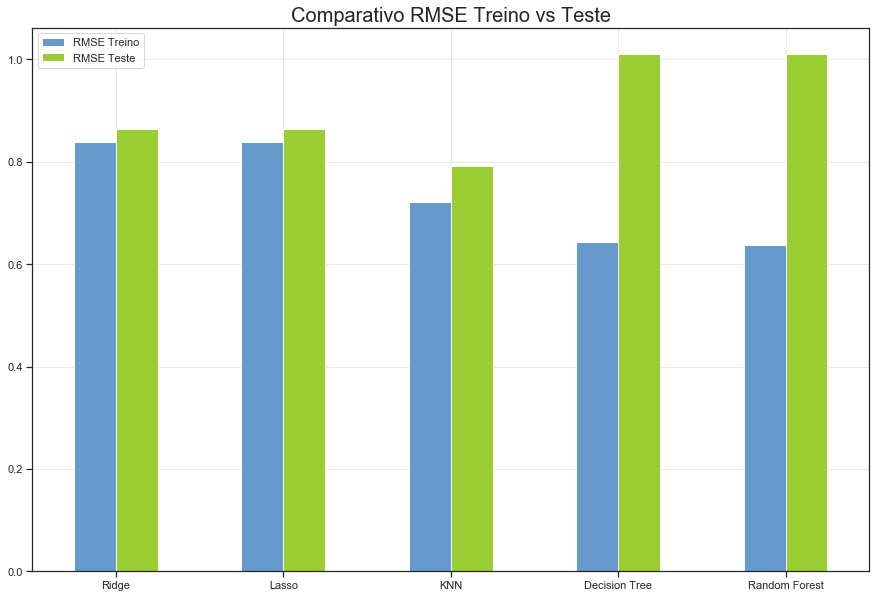

In [567]:
scores_plot(rmse_scores)

# Aplicando os melhores valores de parametros

In [813]:
taget_df = pd.read_csv('../data/cartola_2014/cartola_2014_test.csv')

In [814]:
taget_df[['PE','FC','FS','RB']].shape

(1610, 4)

In [815]:
taget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 33 columns):
atleta_id       1610 non-null int64
rodada          1610 non-null int64
clube_id        839 non-null float64
participou      1610 non-null int64
posicao_id      839 non-null float64
jogos_num       1610 non-null int64
pontos_num      1610 non-null float64
media_num       1610 non-null float64
preco_num       1610 non-null float64
variacao_num    1610 non-null float64
partida_id      1610 non-null float64
mando           1610 non-null int64
titular         839 non-null float64
substituido     1610 non-null int64
tempo_jogado    839 non-null float64
FS              1610 non-null int64
PE              1610 non-null int64
A               1610 non-null int64
FT              1610 non-null int64
FD              1610 non-null int64
FF              1610 non-null int64
G               1610 non-null int64
I               1610 non-null int64
PP              1610 non-null int64
RB             

In [816]:
better_corr = cartola[['PE','FC','FS','RB']]

X = cartola[['PE','FC','FS','RB']]
y = cartola['nota']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [817]:
norm = StandardScaler()
norm = norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [818]:
rmse_val = [] 
for K in range(15):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_norm, y_train)
    pred = model.predict(X_test_norm)
    error = np.sqrt(mean_squared_error( y_test, pred))
    rmse_val.append({'k':K, 'err':error})
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.4645186868083875
RMSE value for k=  2 is: 1.3305799956088629
RMSE value for k=  3 is: 1.2746951492281648
RMSE value for k=  4 is: 1.2603882521428824
RMSE value for k=  5 is: 1.2432448811990677
RMSE value for k=  6 is: 1.2215585720326103
RMSE value for k=  7 is: 1.2148129692836775
RMSE value for k=  8 is: 1.2120384907222352
RMSE value for k=  9 is: 1.286130651199363
RMSE value for k=  10 is: 1.2589331321950783
RMSE value for k=  11 is: 1.2437043434148747
RMSE value for k=  12 is: 1.2301335811016385
RMSE value for k=  13 is: 1.221023704347795
RMSE value for k=  14 is: 1.2131093600978309
RMSE value for k=  15 is: 1.2078040695925556


In [819]:
min_err = min(x['err'] for x in rmse_val)
better = next(item for item in rmse_val if item["err"] == min_err)
better

{'k': 15, 'err': 1.2078040695925556}

In [820]:
better['k']
model = KNeighborsRegressor(n_neighbors = better['k'])
model.fit(X_train_norm, y_train)
pred = model.predict(X_test_norm)
error = np.sqrt(mean_squared_error( y_test, pred))
print('RMSE value is:', error)

RMSE value is: 1.2078040695925556


In [821]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_inputed = imp.fit_transform(taget_df[['PE','FC','FS','RB']])

In [822]:
df_inputed.shape

(1610, 4)

In [837]:
pred_target = model.predict(df_inputed)
df_forest_test = pd.DataFrame({'ID': taget_df['atleta_id'], 'nota': pred_target.flatten()})

In [833]:
df_forest_test.head(100)

,ID,nota
0,68910,5.300000
1,78123,5.300000
2,89295,5.300000
3,37738,5.500000
4,50490,6.033333
5,69214,5.300000
6,71639,5.966667
7,68995,5.800000
8,74140,5.300000
9,78932,5.633333


In [827]:
df_forest_test.to_csv('antonio_esteves_submission.csv', index=False)

In [828]:
df_forest_test.shape

(1610, 2)